In [2]:
# load packages 
library(reshape2)
library(ggplot2)
library(lme4)
library(lmerTest)
library(Rmisc)
library(plyr)
library(ggsignif)
library(gridExtra)
library(ggridges)
library(corrplot)
library(gridGraphics)
library(grid)
library(broom)
library(ggbeeswarm)
library(brms)
library(dplyr)
library(ggpattern)

In [3]:
# move to data folder
setwd('data/')

In [4]:
# read in data files
pilot_choice<-read.csv('pilot_choice.csv')
choice<-read.csv('data_choice.csv')
ratings<-read.csv('data_ratings.csv')
foodRatings<-read.csv('data_foodRatings.csv')

# model files
model_preds<-read.csv('model_predictions.csv')

In [5]:
# subsets
foodChoice<-subset(choice, blockType=="food")
controlChoice<-subset(choice, blockType=="control")

# food choice subsets
block1<-subset(foodChoice, (block==1))
block2<-subset(foodChoice, (block==2))

# similar overall learning between groups and tasks

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


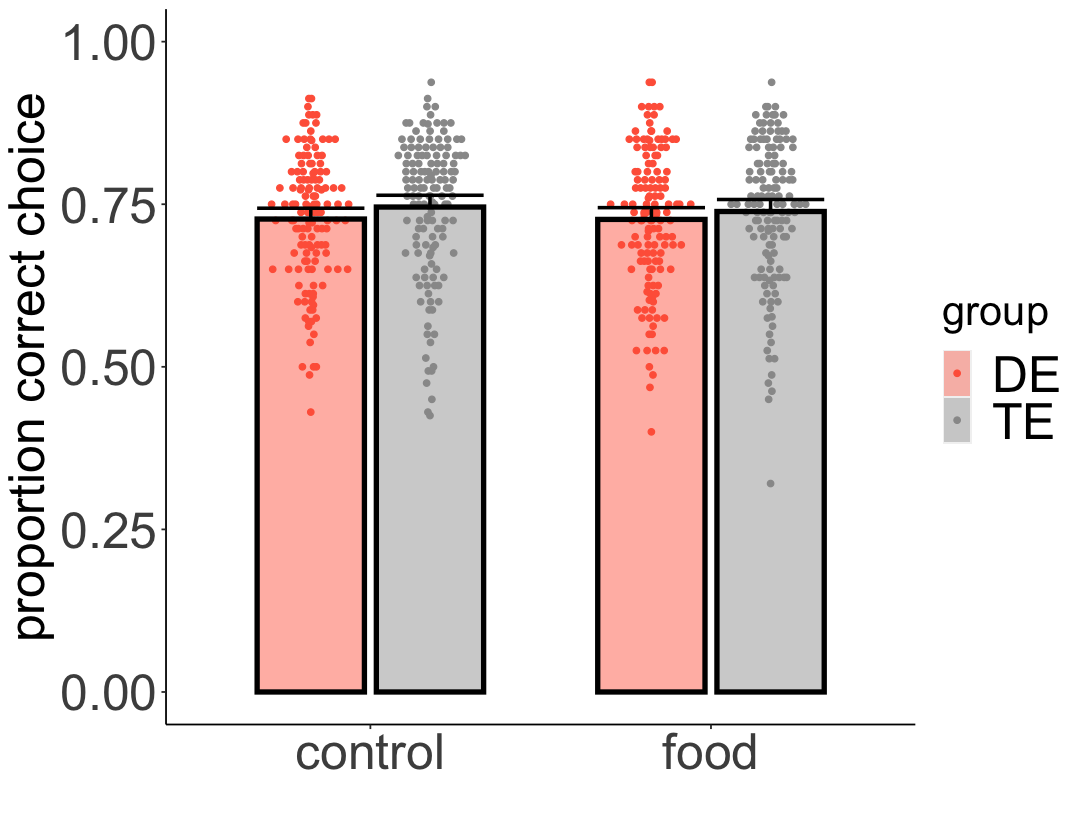

In [6]:
# plot general choice for more rewarding outcome by anorexia group and task 
overall_sub<- summarySE(choice, measurevar="rewChoice", groupvars=c("blockType","group","participant"), na.rm=TRUE, conf.interval=.95)
overall<- summarySE(overall_sub, measurevar="rewChoice", groupvars=c("blockType","group"), na.rm=TRUE, conf.interval=.95)

options(repr.plot.width=9,repr.plot.height=7)

ggplot(overall,aes(x=blockType,y=rewChoice,fill=group))+
  geom_quasirandom(bandwidth=0.001,data=overall_sub,mapping=aes(x=blockType,y=rewChoice,fill=group,color=group,group=group),dodge.width=0.7)+  
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+ci,width=0.7),linewidth=1,color="black",position="dodge2")+
  geom_bar(stat="identity",alpha=0.4,width=0.7,position="dodge2")+
  scale_fill_manual(values=c("#FF6347","#999999"))+scale_colour_manual(values=c("#FF6347","#999999"))+
  geom_bar(stat="identity",color="black",alpha=0.1,width=0.7,size=1.5,show.legend=FALSE,position="dodge2")+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=30),legend.title=element_text(size=25))+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0,1))

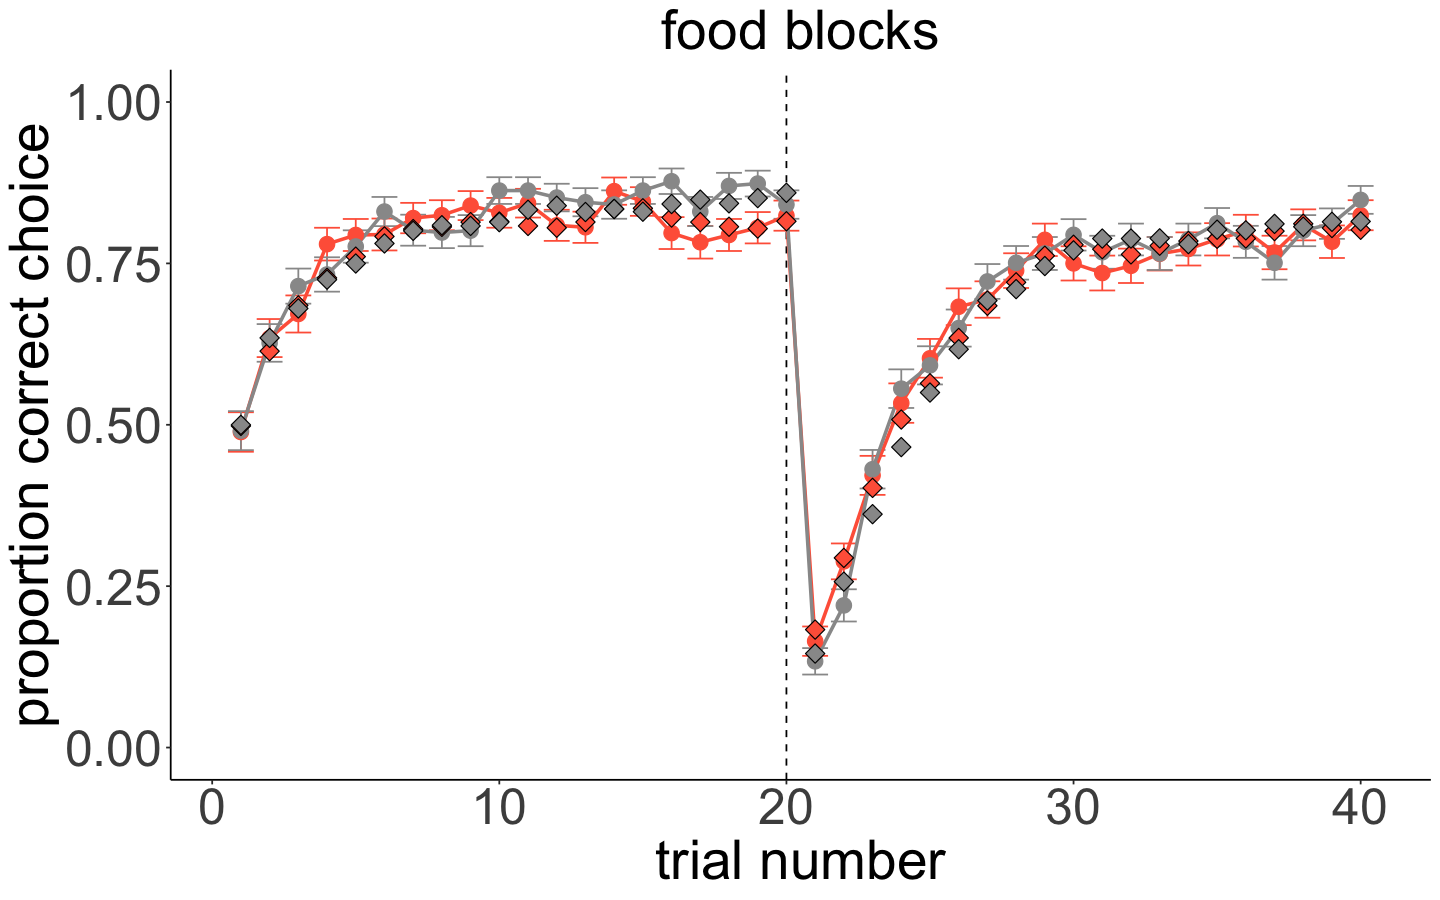

In [7]:
# trial by trial performance
foodSum<- summarySE(foodChoice, measurevar="rewChoice", groupvars=c("group","trialNumber"), na.rm=TRUE, conf.interval=.95)
modelSum<- summarySE(model_preds, measurevar="predRewChoice", groupvars=c("group","trialNumber"), na.rm=TRUE, conf.interval=.95)

foodSum$data<-'behavior'
modelSum$data<-'model'
colnames(modelSum)[4]<-'rewChoice'

options(repr.plot.width=12,repr.plot.height=7.5)

ggplot(foodSum, aes(x = trialNumber, y = rewChoice, color = group, fill = group)) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=33),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=33),legend.text=element_text(size=30),legend.title=element_text(size=25),legend.position='none')+
  geom_vline(xintercept = 20, linetype = "dashed", colour = "black") +
  ggtitle('food blocks')+
  geom_errorbar(aes(ymin=rewChoice-se, ymax=rewChoice+se))+
  scale_fill_manual(values = c("#FF6347", "#999999")) + scale_color_manual(values = c("#FF6347", "#999999")) + 
  geom_line(size = 1, alpha=1) + geom_point(size = 4) + coord_cartesian(ylim = c(0, 1)) +
  xlab('trial number') + ylab('proportion correct choice')+
  geom_point(data = modelSum, aes(x = trialNumber, y = rewChoice), size = 4, shape = 23,color='black')

In [8]:
# no significant differences between groups or by blocktype
summary(glmer(rewChoice~group+scale(BMI)+(1|participant),family=binomial,data=choice,glmerControl(optimizer="bobyqa")))

summary(glmer(rewChoice~group*blockType+scale(BMI)+(blockType|participant),family=binomial,data=choice,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group + scale(BMI) + (1 | participant)
   Data: choice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 49183.5  49218.2 -24587.7  49175.5    43524 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8839 -1.0978  0.5139  0.6102  1.1752 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.2075   0.4555  
Number of obs: 43528, groups:  participant, 279

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.03610    0.04522  22.911   <2e-16 ***
groupTE      0.05713    0.06785   0.842    0.400    
scale(BMI)  -0.02796    0.03386  -0.826    0.409    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
           (Intr) gropTE
groupTE    -0.757       
scale(BMI) -0.373  0.492

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * blockType + scale(BMI) + (blockType | participant)
   Data: choice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 49137.1  49206.6 -24560.6  49121.1    43520 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9916 -1.0731  0.5127  0.6097  1.2669 

Random effects:
 Groups      Name          Variance Std.Dev. Corr 
 participant (Intercept)   0.2213   0.4704        
             blockTypefood 0.1038   0.3222   -0.25
Number of obs: 43528, groups:  participant, 279

Fixed effects:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            1.037714   0.048938  21.204   <2e-16 ***
groupTE                0.078440   0.072768   1.078    0.281    
blockTypefood          0.008088   0.042045   0.192    0.847    
scale(BMI)            -0.027523   0.033958  -0.810  

# typical eaters (TE) learned better from high-calorie food; disordered eaters (DE) learned better from low-calorie food

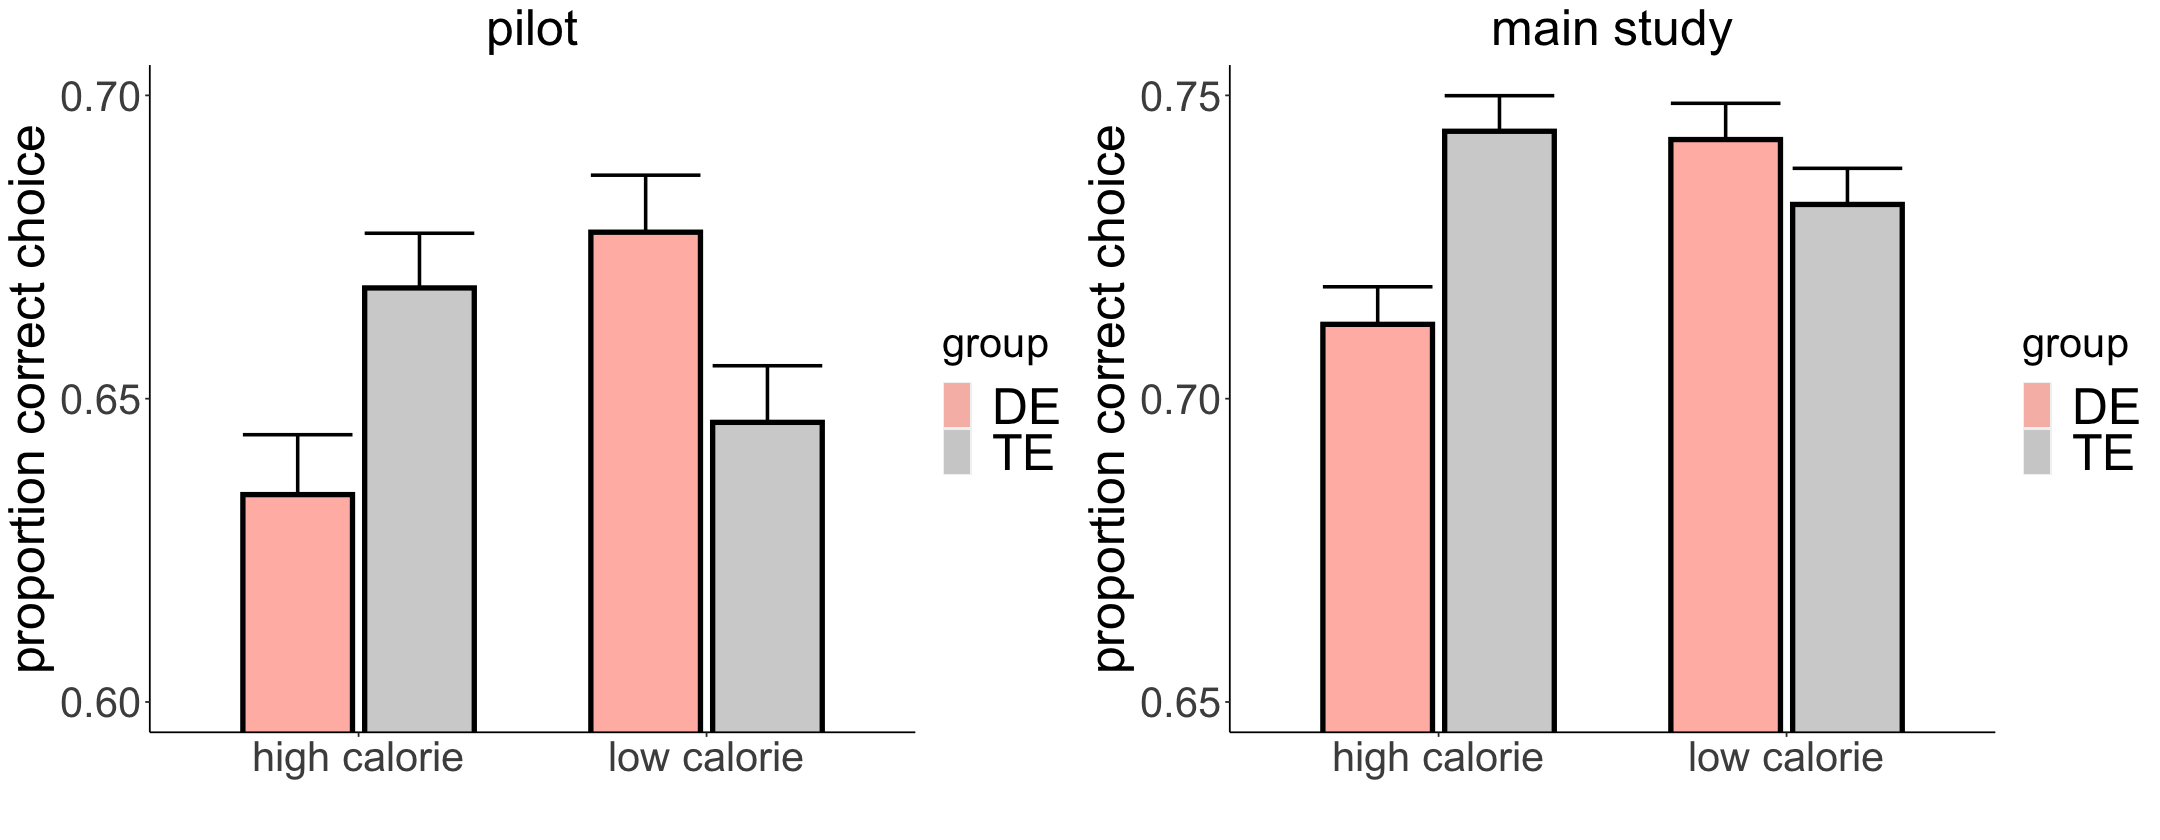

In [9]:
options(repr.plot.width=18,repr.plot.height=7)

pilot_means<- summarySE(pilot_choice, measurevar="rewChoice", groupvars=c("group","rewCat"), na.rm=TRUE, conf.interval=.95)
study_means<- summarySE(foodChoice, measurevar="rewChoice", groupvars=c("rewCat","group"), na.rm=TRUE, conf.interval=.95)

p1<-ggplot(pilot_means,aes(x=rewCat,y=rewChoice,fill=group))+
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+se,width=0.7),size=1,color="black",position="dodge2")+
  geom_bar(stat="identity",alpha=0.4,width=0.7,position="dodge2")+
  geom_bar(stat="identity",alpha=0.1,width=0.7,size=1.5,show.legend=FALSE,position="dodge2",color='black')+
  scale_fill_manual(values=c("#FF6347","#999999"))+scale_colour_manual(values=c("#FF6347","#999999"))+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=25),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=30),legend.title=element_text(size=25))+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0.60,0.70))+scale_y_continuous(breaks = c(0.60,0.65,0.70,0.75))+
  scale_x_discrete(labels = c("high calorie", 'low calorie'))+ggtitle('pilot')

p2<-ggplot(study_means,aes(x=rewCat,y=rewChoice,fill=group))+
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+se,width=0.7),size=1,color="black",position="dodge2")+
  geom_bar(stat="identity",alpha=0.4,width=0.7,position="dodge2")+
  geom_bar(stat="identity",alpha=0.1,width=0.7,size=1.5,show.legend=FALSE,position="dodge2",color='black')+
  scale_fill_manual(values=c("#FF6347","#999999"))+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=25),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=30),legend.title=element_text(size=25))+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0.65,0.75))+scale_y_continuous(breaks = c(0.60,0.65,0.70,0.75))+
  scale_x_discrete(labels = c("high calorie", 'low calorie'))+ggtitle('main study')

grid.arrange(p1,p2,nrow=1,ncol=2)

In [10]:
# pilot sample interaction
summary(glmer(rewChoice~group*rewCat+scale(BMI)+(1|participant),family=binomial,data=pilot_choice,glmerControl(optimizer="bobyqa")))

# main study interaction
summary(glmer(rewChoice~group*rewCat+scale(BMI)+(1|participant),family=binomial,data=foodChoice,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat + scale(BMI) + (1 | participant)
   Data: pilot_choice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 12969.7  13013.1  -6478.8  12957.7    10157 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0158 -1.2397  0.6397  0.7346  1.0760 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.1289   0.359   
Number of obs: 10163, groups:  participant, 226

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          0.54224    0.05614   9.658  < 2e-16 ***
groupTE              0.17924    0.07761   2.310 0.020914 *  
rewCatloCal          0.23378    0.06352   3.680 0.000233 ***
scale(BMI)           0.03283    0.03212   1.022 0.306605    
groupTE:rewCatloCal -0.32546    0.08762  -3.714 0.000204 ***
---
Signif. co

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat + scale(BMI) + (1 | participant)
   Data: foodChoice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 24664.6  24712.5 -12326.3  24652.6    21766 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9351 -1.0906  0.5096  0.6172  1.2528 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.2557   0.5057  
Number of obs: 21772, groups:  participant, 279

Fixed effects:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          0.96964    0.05672  17.095  < 2e-16 ***
groupTE              0.14618    0.08458   1.728 0.083925 .  
rewCatloCal          0.16121    0.04440   3.631 0.000282 ***
scale(BMI)          -0.03110    0.03918  -0.794 0.427345    
groupTE:rewCatloCal -0.22724    0.06267  -3.626 0.000288 ***
---
Signif. code

# positive and negative emotional arousal enhanced group-specific biases

In [11]:
# no effect of arousal manipulation on overall performance
summary(glmer(rewChoice~block+(block|participant),family=binomial,data=foodChoice,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ block + (block | participant)
   Data: foodChoice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 24562.2  24602.2 -12276.1  24552.2    21767 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0502 -1.0457  0.4943  0.6149  1.4254 

Random effects:
 Groups      Name        Variance Std.Dev. Corr 
 participant (Intercept) 1.0151   1.008         
             block       0.3434   0.586    -0.86
Number of obs: 21772, groups:  participant, 279

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.04809    0.07954  13.178   <2e-16 ***
block        0.02519    0.04857   0.519    0.604    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
      (Intr)
block -0.898

Automatically converting the following non-factors to factors: group, rewCat

Automatically converting the following non-factors to factors: group, rewCat

Automatically converting the following non-factors to factors: group, rewCat

Automatically converting the following non-factors to factors: group, rewCat



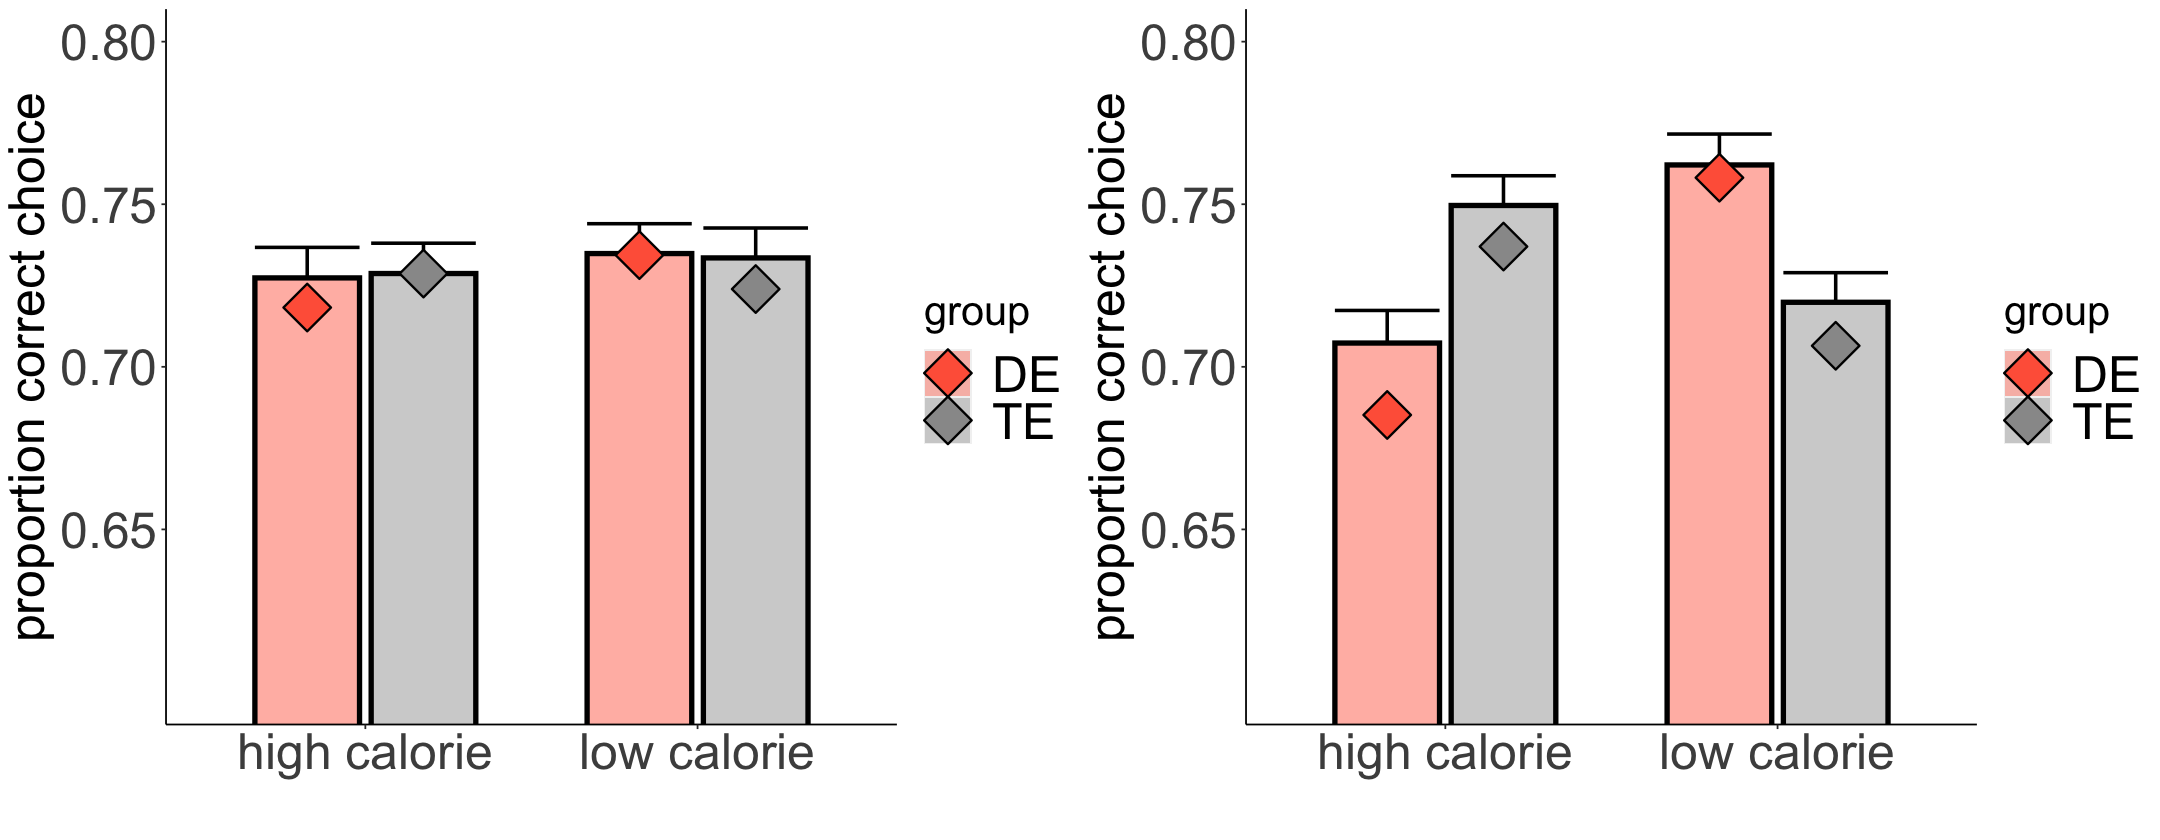

In [13]:
options(repr.plot.width=18,repr.plot.height=7)

b1<- summarySEwithin(block1, measurevar="rewChoice", withinvars=c("group","rewCat"), idvar="participant", na.rm=TRUE, conf.interval=.95)
b2<- summarySEwithin(block2, measurevar="rewChoice", withinvars=c("group","rewCat"), idvar="participant", na.rm=TRUE, conf.interval=.95)

b1_m<- summarySEwithin(model_preds[model_preds$block==1,], measurevar="predRewChoice", withinvars=c("group","rewCat"), idvar="participant", na.rm=TRUE, conf.interval=.95)
b2_m<- summarySEwithin(model_preds[model_preds$block==2,], measurevar="predRewChoice", withinvars=c("group","rewCat"), idvar="participant", na.rm=TRUE, conf.interval=.95)
 
p1<-ggplot(b1,aes(x=rewCat,y=rewChoice,fill=group))+
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+se,width=0.7),size=1,color="black",position="dodge2")+
  geom_bar(stat="identity",alpha=0.4,width=0.7,position="dodge2")+
  geom_bar(stat="identity",alpha=0.1,width=0.7,size=1.5,show.legend=FALSE,position="dodge2",color='black')+
  scale_fill_manual(values=c("#FF6347","#999999"))+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=30),legend.title=element_text(size=25))+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0.6,0.8))+scale_y_continuous(breaks = c(0.65,0.70,0.75,0.80))+
  geom_point(data = b1_m, aes(x = rewCat, y = predRewChoice), size = 10, shape = 23,color='black',position = position_dodge(width = 0.7),stroke=1)+
  scale_x_discrete(labels = c("high calorie", 'low calorie'))

p2<-ggplot(b2,aes(x=rewCat,y=rewChoice,fill=group))+
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+se,width=0.7),size=1,color="black",position="dodge2")+
  geom_bar(stat="identity",alpha=0.4,width=0.7,position="dodge2")+
  geom_bar(stat="identity",alpha=0.1,width=0.7,size=1.5,show.legend=FALSE,position="dodge2",color='black')+
  scale_fill_manual(values=c("#FF6347","#999999"))+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=30),legend.title=element_text(size=25))+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0.6,0.8))+scale_y_continuous(breaks = c(0.65,0.70,0.75,0.80))+
  geom_point(data = b2_m, aes(x = rewCat, y = predRewChoice), size = 10, shape = 23,color='black',position = position_dodge(width = 0.7),stroke=1)+
  scale_x_discrete(labels = c("high calorie", 'low calorie'))

grid.arrange(p1,p2,nrow=1,ncol=2)

In [14]:
# 3-way interaction: group, pre/post arousal, rewarding category
summary(glmer(rewChoice~group*rewCat*block+scale(BMI)+(rewCat+block|participant),family=binomial,data=foodChoice,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat * block + scale(BMI) + (rewCat + block |  
    participant)
   Data: foodChoice
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 24327.2  24447.0 -12148.6  24297.2    21757 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5372 -0.9014  0.4748  0.6023  1.6452 

Random effects:
 Groups      Name        Variance Std.Dev. Corr       
 participant (Intercept) 1.2140   1.1018              
             rewCatloCal 0.5135   0.7166   -0.35      
             block       0.3561   0.5968   -0.84  0.11
Number of obs: 21772, groups:  participant, 279

Fixed effects:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)                1.32812    0.14033   9.464  < 2e-16 ***
groupTE                   -0.49695    0.19863  -2.502 0.012351 *  
rewCatloCal         

In [15]:
# no significant influence of wheel-of-fortune valence on post-arousal block
summary(glmer(rewChoice~group*rewCat*wof_valence+scale(BMI)+(rewCat|participant),family=binomial,data=foodChoice[foodChoice$block==2,],glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ group * rewCat * wof_valence + scale(BMI) + (rewCat |  
    participant)
   Data: foodChoice[foodChoice$block == 2, ]
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 11592.3  11679.5  -5784.1  11568.3    10615 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1292 -0.7594  0.4322  0.5845  1.7860 

Random effects:
 Groups      Name        Variance Std.Dev. Corr 
 participant (Intercept) 0.6631   0.8143        
             rewCatloCal 1.6219   1.2735   -0.65
Number of obs: 10627, groups:  participant, 266

Fixed effects:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      0.952130   0.118541   8.032 9.58e-16 ***
groupTE                          0.375733   0.170519   2.203  0.02756 *  
rewCatloCal                      0.360755   0.177

## arousal manipulation: changes in ratings

In [16]:
# subset ratings
arousal<-subset(ratings,trial=='arousal')
valence<-subset(ratings,trial=='happy')

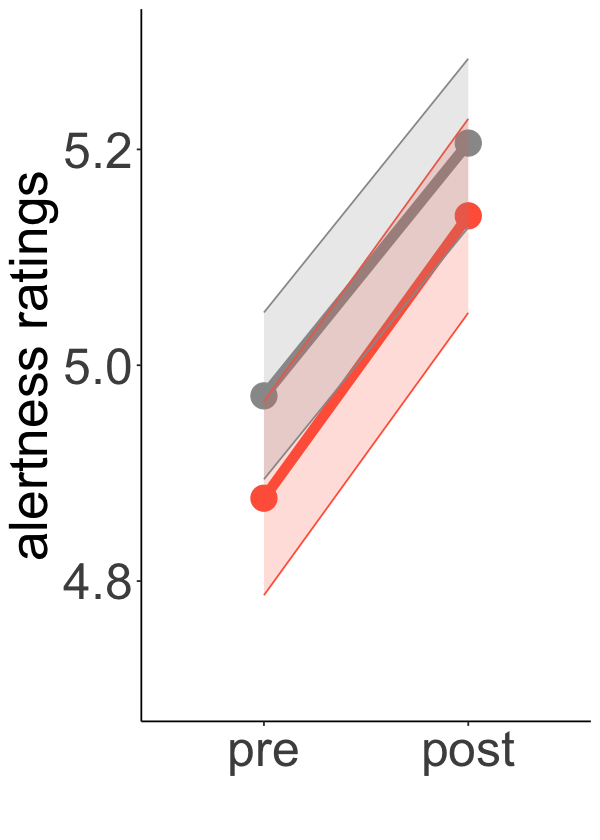

In [17]:
options(repr.plot.width=5,repr.plot.height=7)

arousal_means<-summarySE(arousal,measurevar="response",groupvars=c("group","phase"),na.rm=TRUE)
arousal_means2<-subset(arousal_means, phase=='pre_arousal'|phase=='post_arousal')
arousal_means2$phase<-factor(arousal_means2$phase, levels = c('pre_arousal','post_arousal'))

ggplot(arousal_means2,aes(x=phase,y=response,fill=group,color=group,group=group))+
  ylab("alertness ratings")+xlab("")+guides(group="none")+geom_point(size=7)+
  geom_line(size=3)+
  scale_fill_manual(values=c("#FF6347","#999999"))+scale_colour_manual(values=c("#FF6347","#999999"))+ 
  geom_ribbon(mapping=aes(ymin=response-se,ymax=response+se),alpha=0.2)+coord_cartesian(ylim=c(4.7,5.3))+
  xlab('')+theme(strip.text.x = element_text(size = 30), panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=32),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=30),legend.title=element_text(size=25),legend.position='none')+
  scale_x_discrete(labels = c("pre", 'post'))


In [18]:
# alertness ratings
arousalContrast<-subset(arousal, phase=='pre_arousal'|phase=='post_arousal')
arousalContrast$phase<-factor(arousalContrast$phase, levels = c('pre_arousal','post_arousal'))
summary(lmer(scale(response)~phase+(1|participant),data=arousalContrast,control=lmerControl(optimizer="bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(response) ~ phase + (1 | participant)
   Data: arousalContrast
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 1449.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6909 -0.3692  0.1720  0.6135  3.3196 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.5440   0.7375  
 Residual                0.4438   0.6662  
Number of obs: 545, groups:  participant, 279

Fixed effects:
                   Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)        -0.12298    0.05950 418.84327  -2.067   0.0394 *  
phasepost_arousal   0.26033    0.05746 268.90736   4.531 8.85e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
phaspst_rsl -0.465

In [19]:
# no significant difference to alertness ratings by group
summary(mod<-lmer(scale(response)~phase*group+(1|participant),data=arousalContrast,control=lmerControl(optimizer="bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(response) ~ phase * group + (1 | participant)
   Data: arousalContrast
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 1454.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6956 -0.3419  0.1979  0.5876  3.2863 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.5441   0.7377  
 Residual                0.4453   0.6673  
Number of obs: 545, groups:  participant, 279

Fixed effects:
                           Estimate Std. Error        df t value Pr(>|t|)   
(Intercept)                -0.17163    0.08468 417.64522  -2.027  0.04331 * 
phasepost_arousal           0.26985    0.08223 269.09015   3.282  0.00117 **
groupTE                     0.09626    0.11911 417.64522   0.808  0.41947   
phasepost_arousal:groupTE  -0.01915    0.11515 268.02164  -0.166  0.86804   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.0

In [21]:
# valence ratings
valContrast<-subset(valence, phase=='pre_arousal'|phase=='post_arousal')
posContrast<-subset(valContrast, wof_valence==1)
negContrast<-subset(valContrast, wof_valence==0)

In [22]:
summary(mod<-lmer(scale(response)~phase+(1|participant),data=posContrast,control=lmerControl(optimizer="bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(response) ~ phase + (1 | participant)
   Data: posContrast
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 570.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.84667 -0.52502  0.03735  0.43632  2.12344 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.4648   0.6818  
 Residual                0.3297   0.5742  
Number of obs: 236, groups:  participant, 118

Fixed effects:
                  Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)        0.45602    0.08206 174.33922   5.557 1.01e-07 ***
phasepre_arousal  -0.91204    0.07476 117.00000 -12.200  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
phasepr_rsl -0.456

In [23]:
summary(mod<-lmer(scale(response)~phase+(1|participant),data=negContrast,control=lmerControl(optimizer="bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(response) ~ phase + (1 | participant)
   Data: negContrast
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 703.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7789 -0.5711 -0.1025  0.6039  2.6014 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.1284   0.3583  
 Residual                0.5036   0.7097  
Number of obs: 296, groups:  participant, 148

Fixed effects:
                  Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)       -0.60736    0.06535 282.34876  -9.294   <2e-16 ***
phasepre_arousal   1.21472    0.08250 147.00000  14.725   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
phasepr_rsl -0.631

In [24]:
summary(mod<-lmer(scale(response)~phase*group+(1|participant),data=valContrast,control=lmerControl(optimizer="bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(response) ~ phase * group + (1 | participant)
   Data: valContrast
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 1530.9

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.38646 -0.62972 -0.01896  0.67436  1.87733 

Random effects:
 Groups      Name        Variance Std.Dev.
 participant (Intercept) 0.1147   0.3387  
 Residual                0.8486   0.9212  
Number of obs: 545, groups:  participant, 279

Fixed effects:
                          Estimate Std. Error        df t value Pr(>|t|)   
(Intercept)               -0.25679    0.08604 535.34549  -2.984  0.00297 **
phasepre_arousal           0.31738    0.11279 277.27663   2.814  0.00524 **
groupTE                    0.14462    0.12035 535.05993   1.202  0.23002   
phasepre_arousal:groupTE   0.08393    0.15813 275.70318   0.531  0.59603   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.

# individual differences in disordered eaters

In [26]:
# subset by disordered eaters
DEs<-subset(foodChoice, group=='DE')

Automatically converting the following non-factors to factors: bingesV, rewCat

Automatically converting the following non-factors to factors: bingesV, rewCat



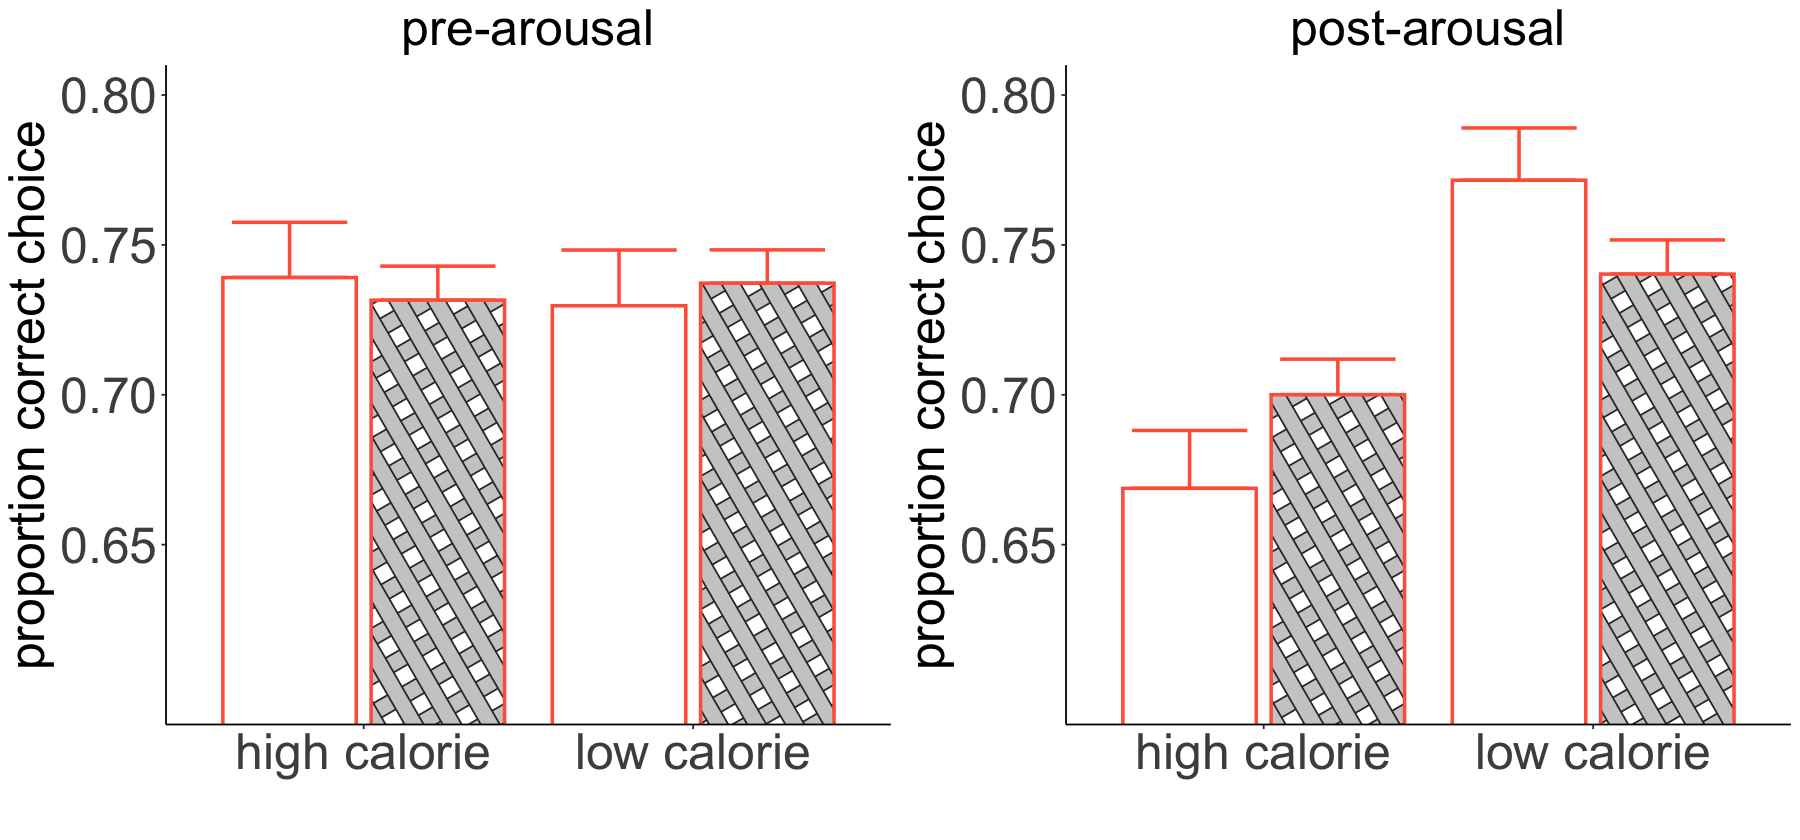

In [28]:
# participants with and without binge-eating episodes
options(repr.plot.width=15,repr.plot.height=7)

b1<- summarySEwithin(DEs[DEs$block==1,], measurevar="rewChoice", withinvars=c("bingesV","rewCat"), idvar="participant", na.rm=TRUE, conf.interval=.95)
b2<- summarySEwithin(DEs[DEs$block==2,], measurevar="rewChoice", withinvars=c("bingesV","rewCat"), idvar="participant", na.rm=TRUE, conf.interval=.95)

b1_binge<-b1[-c(5,6),]
b2_binge<-b2[-c(5,6),]

p1<-ggplot(b1_binge,aes(x=rewCat,y=rewChoice,fill=bingesV))+
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+se,width=0.7),size=1,color="#FF6347",position=position_dodge(width=0.9))+
  geom_col_pattern(aes(pattern=bingesV),position="dodge2",fill="white",color="#FF6347",size=1, pattern_density=0.5)+
  scale_pattern_manual(values=c("none","crosshatch"))+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=25),legend.title=element_text(size=25),legend.position='none')+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0.6,0.8))+scale_y_continuous(breaks = c(0.65,0.70,0.75,0.80))+
  scale_x_discrete(labels = c("high calorie", 'low calorie'))+ggtitle('pre-arousal')

p2<-ggplot(b2_binge,aes(x=rewCat,y=rewChoice,fill=bingesV))+
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+se,width=0.7),size=1,color="#FF6347",position=position_dodge(width=0.9))+
  geom_col_pattern(aes(pattern=bingesV),position="dodge2",fill="white",color="#FF6347",size=1,pattern_density=0.5)+
  scale_pattern_manual(values=c("none","crosshatch"))+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=25),legend.title=element_text(size=25),legend.position='none')+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0.6,0.8))+scale_y_continuous(breaks = c(0.65,0.70,0.75,0.80))+
  scale_x_discrete(labels = c("high calorie", 'low calorie'))+ggtitle('post-arousal')

grid.arrange(p1,p2,nrow=1,ncol=2)

In [29]:
summary(glmer(rewChoice~rewCat*block*binges+scale(BMI)+(rewCat+block|participant),family=binomial,data=DEs,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ rewCat * block * binges + scale(BMI) + (rewCat +  
    block | participant)
   Data: DEs
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 11517.3  11625.8  -5743.7  11487.3    10207 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5804 -0.9065  0.4809  0.6142  1.4394 

Random effects:
 Groups      Name        Variance Std.Dev. Corr       
 participant (Intercept) 1.1858   1.0890              
             rewCatloCal 0.5393   0.7344   -0.34      
             block       0.3280   0.5727   -0.84  0.04
Number of obs: 10222, groups:  participant, 128

Fixed effects:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.33635    0.20796   6.426 1.31e-10 ***
rewCatloCal              -0.77550    0.23740  -3.267 0.001089 ** 
block                    -0.3

Automatically converting the following non-factors to factors: medication, rewCat

Automatically converting the following non-factors to factors: medication, rewCat



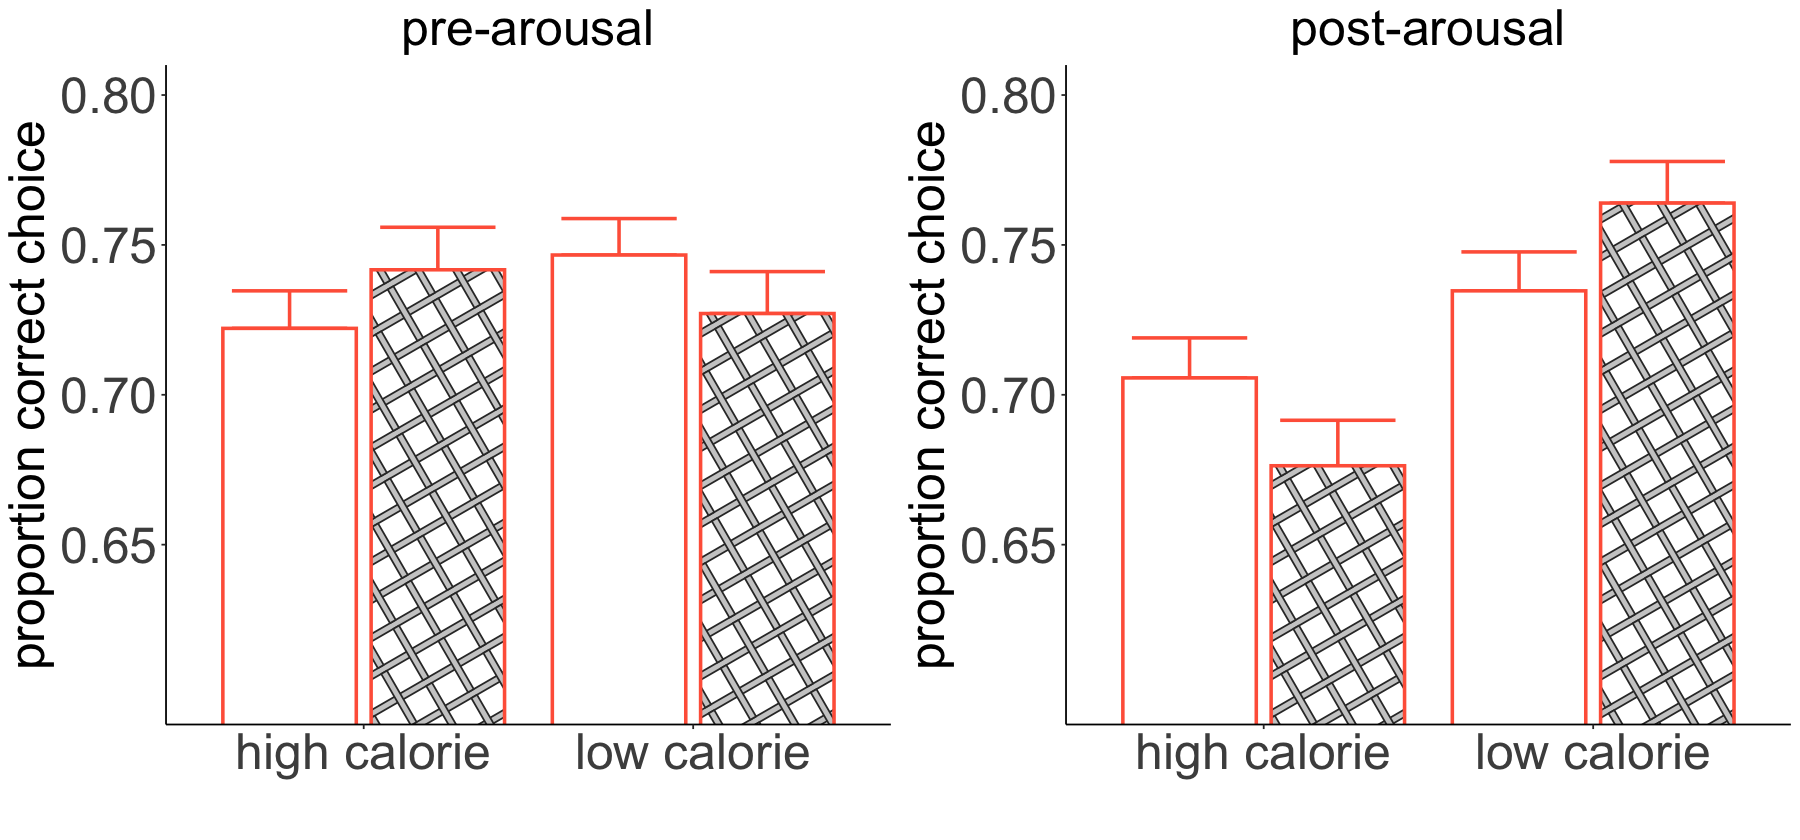

In [30]:
# participants with and without psychotropic medication  
options(repr.plot.width=15,repr.plot.height=7)

b1<- summarySEwithin(DEs[DEs$block==1,], measurevar="rewChoice", withinvars=c("medication","rewCat"), idvar="participant", na.rm=TRUE, conf.interval=.95)
b2<- summarySEwithin(DEs[DEs$block==2,], measurevar="rewChoice", withinvars=c("medication","rewCat"), idvar="participant", na.rm=TRUE, conf.interval=.95)

b1_med<-b1[-c(5,6),]
b2_med<-b2[-c(5,6),]

p1<-ggplot(b1_med,aes(x=rewCat,y=rewChoice,fill=medication))+
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+se,width=0.7),size=1,color="#FF6347",position=position_dodge(width=0.9))+
  geom_col_pattern(aes(pattern=medication),position="dodge2",fill="white",color="#FF6347",size=1)+
  scale_pattern_manual(values=c("none","weave"))+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=25),legend.title=element_text(size=25),legend.position='none')+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0.6,0.8))+scale_y_continuous(breaks = c(0.65,0.70,0.75,0.80))+
  scale_x_discrete(labels = c("high calorie", 'low calorie'))+ggtitle('pre-arousal')

p2<-ggplot(b2_med,aes(x=rewCat,y=rewChoice,fill=medication))+
  geom_errorbar(aes(ymin=rewChoice, ymax=rewChoice+se,width=0.7),size=1,color="#FF6347",position=position_dodge(width=0.9))+
  geom_col_pattern(aes(pattern=medication),position="dodge2",fill="white",color="#FF6347",size=1)+
  scale_pattern_manual(values=c("none","weave"))+
  xlab('')+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line.x = element_line(colour = "black"), axis.line.y = element_line(colour = "black"),axis.title = element_text(size=30),axis.text = element_text(size=30),plot.title = element_text(hjust = 0.5,size=30),legend.text=element_text(size=25),legend.title=element_text(size=25),legend.position='none')+
  ylab("proportion correct choice")+coord_cartesian(ylim=c(0.6,0.8))+scale_y_continuous(breaks = c(0.65,0.70,0.75,0.80))+
  scale_x_discrete(labels = c("high calorie", 'low calorie'))+ggtitle('post-arousal')

grid.arrange(p1,p2,nrow=1,ncol=2)

In [31]:
summary(glmer(rewChoice~rewCat*block*medication+scale(BMI)+(rewCat+block|participant),family=binomial,data=DEs,glmerControl(optimizer="bobyqa")))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: rewChoice ~ rewCat * block * medication + scale(BMI) + (rewCat +  
    block | participant)
   Data: DEs
Control: glmerControl(optimizer = "bobyqa")

     AIC      BIC   logLik deviance df.resid 
 12100.8  12209.9  -6035.4  12070.8    10686 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5503 -0.9423  0.4806  0.6203  1.4432 

Random effects:
 Groups      Name        Variance Std.Dev. Corr       
 participant (Intercept) 1.1924   1.0920              
             rewCatloCal 0.5320   0.7294   -0.29      
             block       0.3245   0.5697   -0.84  0.00
Number of obs: 10701, groups:  participant, 138

Fixed effects:
                             Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   1.22007    0.18385   6.636 3.22e-11 ***
rewCatloCal                   0.10764    0.21074   0.511  0.60952    
block        

# food ratings

In [32]:
# subset by question type
health<-subset(foodRatings, question=='health')
calories<-subset(foodRatings, question=='calories')

In [33]:
# health judgments 
summary(mod<-lmer(response~foodCat*group+(foodCat|participant),data=health,control=lmerControl(optimizer="bobyqa")))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: response ~ foodCat * group + (foodCat | participant)
   Data: health
Control: lmerControl(optimizer = "bobyqa")

REML criterion at convergence: 29978.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.7582 -0.5890  0.0950  0.3473  4.4964 

Random effects:
 Groups      Name         Variance Std.Dev. Corr 
 participant (Intercept)  0.2045   0.4522        
             foodCatloCal 0.3246   0.5697   -0.79
 Residual                 0.9870   0.9935        
Number of obs: 10344, groups:  participant, 257

Fixed effects:
                      Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)            2.07525    0.04485 254.66261  46.271  < 2e-16 ***
foodCatloCal           3.59655    0.05791 262.07251  62.107  < 2e-16 ***
groupTE                0.21330    0.06284 255.06662   3.394 0.000798 ***
foodCatloCal:groupTE  -0.27098    0.08115 262.58707  -3.339 0.000961 ***
---
S

In [34]:
# calorie estimation accuracy 
summary(mod<-lm(accuracy~group*foodCat,data=calories)) #not enough trials for mixed effects


Call:
lm(formula = accuracy ~ group * foodCat, data = calories)

Residuals:
     Min       1Q   Median       3Q      Max 
-2816.51   -21.51    47.61   210.99  2028.49 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -177.49      16.91 -10.495  < 2e-16 ***
groupTE               -116.24      23.77  -4.890 1.04e-06 ***
foodCatloCal           131.30      23.88   5.498 4.02e-08 ***
groupTE:foodCatloCal   116.27      33.57   3.463 0.000538 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 602.4 on 5148 degrees of freedom
  (28 observations deleted due to missingness)
Multiple R-squared:  0.02872,	Adjusted R-squared:  0.02815 
F-statistic: 50.73 on 3 and 5148 DF,  p-value: < 2.2e-16
